In [ ]:
Credit RisK Prediction

In [2]:
!pip install imblearn

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load dataset
df = pd.read_csv("train_mini.csv")

# Preview dataset
df.shape

C:\Users\likit\AppData\Local\Temp\ipykernel_32120\209634302.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


(29165, 20)

In [4]:
df

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5067139,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-23400,365243,1,0,1,1,NaN,1.0,-5.0,0
29161,5029193,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15532,-8256,1,0,0,0,Core staff,3.0,-24.0,0
29162,5047710,F,N,Y,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,-17782,-3291,1,1,1,0,Managers,2.0,-29.0,0
29163,5009886,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21635,365243,1,0,1,0,NaN,2.0,-37.0,0


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("train_mini.csv")

# Select two features for visualization
X = df[['Income', 'Age']]  # Replace with your chosen features
y = df['Is high risk']  # Target variable (0 or 1)

# Sample a smaller subset of the data for better visibility
df_sample = df.sample(n=1000, random_state=42)  # Adjust n for more or fewer samples
X_sample = df_sample[['Children count', 'Age']]
y_sample = df_sample['Is high risk']

# Standardize the features
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

# Create the scatter plot


In [6]:
categorical_cols = ['Employment status', 'Education level', 'Marital status', 'Dwelling', 'Job title']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')  # Fill missing values
    df[col] = le.fit_transform(df[col])

# Fill missing numeric columns
numeric_cols = ['Age', 'Employment length', 'Family member count', 'Account age']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Convert boolean-like columns to integers
boolean_cols = ['Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email']
for col in boolean_cols:
    df[col] = df[col].astype(int)

In [7]:
# Binary columns to encode
binary_cols = ['Gender', 'Has a car', 'Has a property']

# Map binary values to 0 and 1
binary_mapping = {
    'Gender': {'M': 1, 'F': 0},
    'Has a car': {'Y': 1, 'N': 0},
    'Has a property': {'Y': 1, 'N': 0}
}

# Apply the mapping
for col, mapping in binary_mapping.items():
    df[col] = df[col].map(mapping)

# Verify the encoding
print(df[binary_cols].head())


   Gender  Has a car  Has a property
0       1          1               1
1       0          1               0
2       0          0               1
3       0          1               1
4       0          0               0


In [8]:
# Define X and y
X = df.drop('Is high risk', axis=1)
y = df['Is high risk']

# Normalize numeric features
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Step 1: Handle Imbalanced Data with SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)


Explained Variance Ratio for each PCA component:
[0.16882168 0.09537898 0.08438221 0.07066991 0.06649333 0.06316899
 0.05560811 0.0546061  0.05040855 0.04627881 0.04353199 0.04267906
 0.03972087 0.0361162  0.03307861]
Cumulative Variance Ratio:
[0.16882168 0.26420066 0.34858287 0.41925278 0.48574611 0.54891509
 0.6045232  0.6591293  0.70953785 0.75581666 0.79934866 0.84202772
 0.88174859 0.9178648  0.95094341]


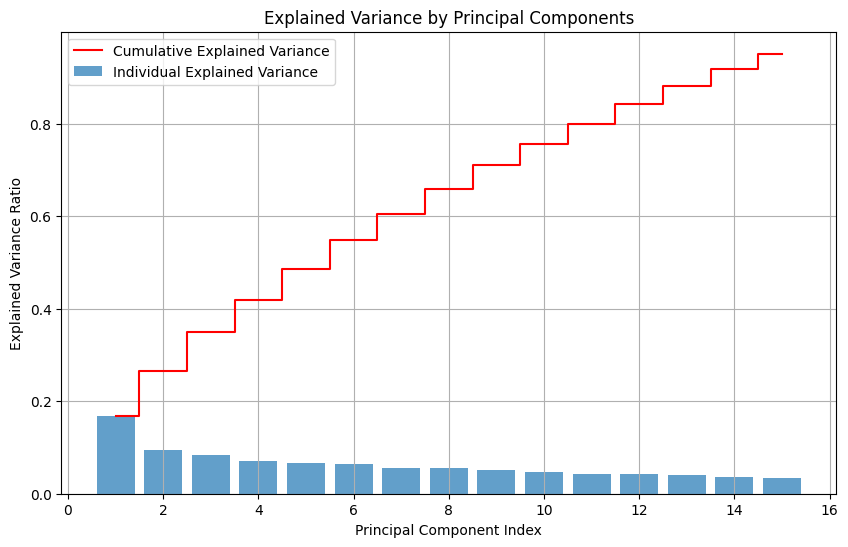

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your dataset and X contains the feature set
X = df.iloc[:, :-1]  # Exclude the target column
y = df.iloc[:, -1]   # Target column

# Step 1: Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print explained variance ratio
print("Explained Variance Ratio for each PCA component:")
print(explained_variance_ratio)

# Print cumulative variance ratio
print("Cumulative Variance Ratio:")
print(cumulative_variance_ratio)

# Step 4: Visualize variance explained by components
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative Explained Variance', color='red')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid()
plt.show()


(29165, 20)
Model Accuracy: 98.53%


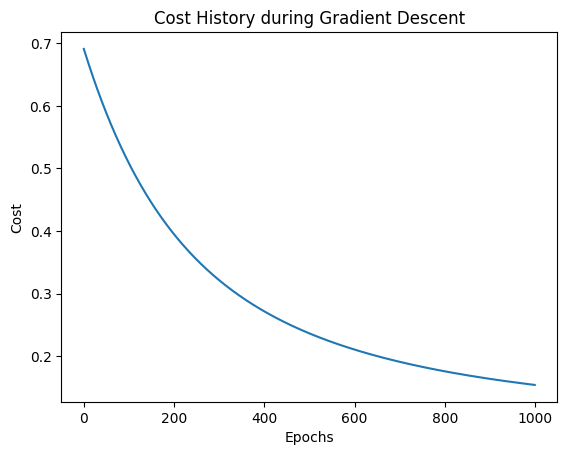

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retaining 95% of variance
X_pca = pca.fit_transform(X_scaled)
print(df.shape)

# Step 4: Add intercept term (bias term) to the feature set
X_with_intercept = np.hstack((np.ones((X_pca.shape[0], 1)), X_pca))

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_intercept, y, test_size=0.2, random_state=42)

# Step 6: Initialize weights (weights should have one more value to accommodate the intercept)
weights = np.zeros(X_train.shape[1])

# Step 7: Set learning rate and epochs
learning_rate = 0.01
epochs = 1000

# Step 8: Perform Gradient Descent
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    cost_history = []
    
    for _ in range(epochs):
        h = sigmoid(np.dot(X, weights))  # Predicted probabilities
        gradient = np.dot(X.T, (h - y)) / m  # Compute the gradient
        weights -= learning_rate * gradient  # Update weights
        cost = compute_cost(X, y, weights)  # Compute the cost (loss)
        cost_history.append(cost)  # Store cost for analysis
        
    return weights, cost_history

# Perform gradient descent to optimize the weights
weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, epochs)

# Step 9: Evaluate the model on the test set
def predict(X, weights):
    return sigmoid(np.dot(X, weights)) >= 0.5  # Threshold at 0.5 for classification

# Predict on the test set
y_pred = predict(X_test, weights)

# Step 10: Evaluate the model performance (you can use accuracy or any other metrics)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Optionally, you can also print the cost history to visualize the convergence
import matplotlib.pyplot as plt
plt.plot(range(epochs), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost History during Gradient Descent')
plt.show()

Epoch 0, Cost: 0.18646822839162144
Epoch 100, Cost: 0.08590989462407675
Epoch 200, Cost: 0.08590987097884
Epoch 300, Cost: 0.0859099590314646
Epoch 400, Cost: 0.08590991627938548
Epoch 500, Cost: 0.08590985693400971
Epoch 600, Cost: 0.08590997579038813
Epoch 700, Cost: 0.08590988716146819
Epoch 800, Cost: 0.08591002448059364
Epoch 900, Cost: 0.08590995378868418
Model Accuracy: 98.53%


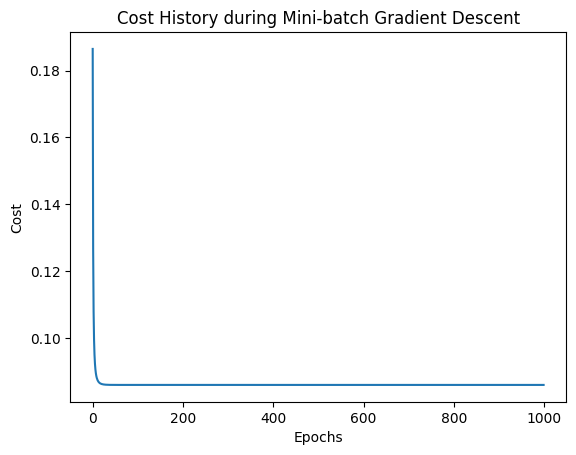

In [11]:




import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing (Scale the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature set

# Step 2: Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retaining 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Step 3: Add intercept term (bias term) to the feature set
X_with_intercept = np.hstack((np.ones((X_pca.shape[0], 1)), X_pca))

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_intercept, y, test_size=0.2, random_state=42)

# Step 5: Initialize weights (weights should have one more value to accommodate the intercept)
weights = np.zeros(X_train.shape[1])

# Step 6: Set learning rate, batch size, and epochs
learning_rate = 0.01
batch_size = 32  # Mini-batch size
epochs = 1000

# Sigmoid and cost functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Mini-batch gradient descent function
def mini_batch_sgd(X, y, weights, learning_rate, batch_size, epochs):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        # Shuffle the data at the start of each epoch
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y.iloc[permutation].values


        # Process mini-batches
        for i in range(0, m, batch_size):
            # Create mini-batch
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            # Compute predictions
            h = sigmoid(np.dot(X_batch, weights))

            # Compute gradients
            gradient = np.dot(X_batch.T, (h - y_batch)) / batch_size

            # Update weights
            weights -= learning_rate * gradient

        # Calculate and record cost after each epoch
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

        # Optionally, print cost at each epoch
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost}")

    return weights, cost_history

# Perform mini-batch gradient descent to optimize the weights
weights, cost_history = mini_batch_sgd(X_train, y_train, weights, learning_rate, batch_size, epochs)

# Step 7: Evaluate the model on the test set
def predict(X, weights):
    return sigmoid(np.dot(X, weights)) >= 0.5  # Threshold at 0.5 for classification

# Predict on the test set
y_pred = predict(X_test, weights)

# Step 8: Evaluate the model performance (you can use accuracy or any other metrics)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Optionally, plot the cost history to visualize the convergence
plt.plot(range(epochs), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost History during Mini-batch Gradient Descent')
plt.show()



In [12]:
import numpy as np

# Function to predict whether the person is at risk (1) or not at risk (0)
def predict_risk(input_data, weights, scaler, pca):
    # Ensure input_data has the same number of features as expected by the model (19 features)
    if input_data.shape[0] != 19:
        raise ValueError("Input data must have 19 features")

    # Step 1: Standardize the input data (reshape it to 2D)
    input_data_scaled = scaler.transform(input_data.reshape(1, -1))  # Use the same scaler used during training

    # Step 2: Apply PCA to the input data
    input_data_pca = pca.transform(input_data_scaled)  # Use the same PCA used during training

    # Step 3: Add intercept term (bias term)
    input_data_with_intercept = np.hstack((np.ones((input_data_pca.shape[0], 1)), input_data_pca))

    # Step 4: Compute prediction using logistic regression
    probability = sigmoid(np.dot(input_data_with_intercept, weights))  # Get the probability

    # Step 5: Return the risk classification (0 or 1)
    return 1 if probability >= 0.5 else 0

# Example input: assuming your input features are similar to the ones you used in the training set
input_data = np.array([5037048, 1, 1, 1, 0, 135000.0, 4, 4, 1, 5, -16271, -3111, 1, 0, 0, 0, 3, 2.0, -17.0])  # Example of 19 features (fixing the number of features)

# Make prediction
risk_prediction = predict_risk(input_data, weights, scaler, pca)

if risk_prediction == 1:
    print("Risk: Yes")
else:
    print("Risk: No")


Risk: No


C:\Users\likit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:

# Import statements


Epoch 0, Cost: 0.08662645040179401
Epoch 100, Cost: 0.08646009540670879
Epoch 200, Cost: 0.08676333378202998
Epoch 300, Cost: 0.08652760483460929
Epoch 400, Cost: 0.08615069995390752
Epoch 500, Cost: 0.08646186751833834
Epoch 600, Cost: 0.08660695861366827
Epoch 700, Cost: 0.08613869694959103
Epoch 800, Cost: 0.08652150629929452
Epoch 900, Cost: 0.0862932435716886
Model Accuracy: 98.53%


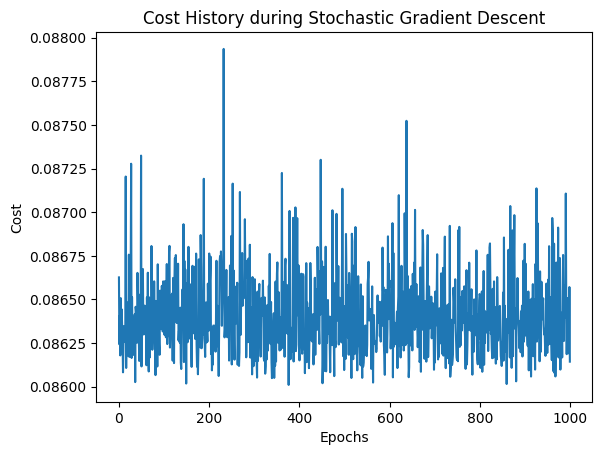

In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing (Scale the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature set

# Step 2: Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retaining 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Step 3: Add intercept term (bias term) to the feature set

X_with_intercept = np.hstack((np.ones((X_pca.shape[0], 1)), X_pca))

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_intercept, y, test_size=0.2, random_state=42)

# Step 5: Initialize weights (weights should have one more value to accommodate the intercept)
weights = np.zeros(X_train.shape[1])

# Step 6: Set learning rate and epochs
learning_rate = 0.01
epochs = 1000

# Sigmoid and cost functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Stochastic Gradient Descent function
def stochastic_gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        # Shuffle the data at the start of each epoch
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y.iloc[permutation].values

        # Process each example individually
        for i in range(m):
            # Select one example
            X_i = X_shuffled[i].reshape(1, -1)
            y_i = y_shuffled[i]

            # Compute predictions
            h = sigmoid(np.dot(X_i, weights))

            # Compute gradients
            gradient = np.dot(X_i.T, (h - y_i))

            # Update weights
            weights -= learning_rate * gradient.flatten()

        # Calculate and record cost after each epoch
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

        # Optionally, print cost at each epoch
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost}")

    return weights, cost_history

# Perform stochastic gradient descent to optimize the weights
weights, cost_history = stochastic_gradient_descent(X_train, y_train, weights, learning_rate, epochs)

# Step 7: Evaluate the model on the test set
def predict(X, weights):
    return sigmoid(np.dot(X, weights)) >= 0.5  # Threshold at 0.5 for classification

# Predict on the test set
y_pred = predict(X_test, weights)

# Step 8: Evaluate the model performance (you can use accuracy or any other metrics)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Optionally, plot the cost history to visualize the convergence
plt.plot(range(epochs), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost History during Stochastic Gradient Descent')
plt.show()


In [18]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 1.4 MB/s eta 0:01:29
   ---------------------------------------- 1.0/124.9 MB 1.5 MB/s eta 0:01:22
   ---------------------------------------- 1.3/124.9 MB 1.6 MB/s eta 0:01:18
    --------------------------------------- 1.8/124.9 MB 1.7 MB/s eta 0:01:13
    --------------------------------------- 2.4/124.9 MB 1.8 MB/s eta 0:01:10
    --------------------------------------- 2.9/124.9 MB 1.9 MB/s eta 0:01:04
   - -------------------------------------- 3.7/124.9 MB 2.1 MB/s eta 0:00:59
   - -------------------------------------- 4.5/124.9 MB 2.2 MB/s eta 0:00:54
   - -------------------------------------- 5.2/124.9 MB 2.4 MB/s eta 0:00:50
   - -------------------------------------- 6.0/124.9 MB 2.5 MB/s eta 0:00:48
   -- -

In [20]:
!pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.8/101.7 MB 1.6 MB/s eta 0:01:04
   ---------------------------------------- 1.0/101.7 MB 1.7 MB/s eta 0:01:01
    --------------------------------------- 1.6/101.7 MB 1.7 MB/s eta 0:00:58
    --------------------------------------- 2.1/101.7 MB 1.9 MB/s eta 0:00:53
   - -------------------------------------- 2.6/101.7 MB 2.1 MB/s eta 0:00:48
   - -------------------------------------- 3.4/101.7 MB 2.2 MB/s eta 0:00:44
   - -------------------------------------- 4.2/101.7 MB 2.4 MB/s eta 0:00:41
   - -------------------------------------- 5.0/101.7 MB 2.6 MB/s eta 0:00:38
   -- ------------------------------------- 5.8/101.7 MB 2.7 MB/s eta 0:00:36
   -- ------------------------------------- 7.1/101.7 MB 2.9 MB/s eta 0:00:33
   --- 

In [22]:
!pip install pytorch-tabnet

   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/203.1 MB 349.5 kB/s eta 0:09:40
   ---------------------------------------- 0.5/203.1 MB 349.5 kB/s eta 0:09:40
   ---------------------------------------- 0.8/203.1 MB 447.7 kB/s eta 0:07:32
   ---------------------------------------- 0.8/203.1 MB 447.7 kB/s eta 0:07:32
   ---------------------------------------- 1.0/203.1 MB 474.9 kB/s eta 0:07:06
   ---------------------------------------- 1.0/203.1 MB 474.9 kB/s eta 0:07:06
   --------------------

In [26]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from pytorch_tabnet.tab_model import TabNetClassifier  # Correct import for TabNet

# Load the dataset (replace with your dataset path)

# PCA to reduce dimensionality (Keep 95% of variance)
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Apply SMOTE to handle class imbalance (oversampling)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)

# Apply ENN to clean the dataset (undersampling)
enn = EditedNearestNeighbours()
X_train_resampled, y_train_resampled = enn.fit_resample(X_train_resampled, y_train_resampled)

# Model 1: LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_lgb = lgb_model.predict(X_test_pca)
lgb_accuracy = accuracy_score(y_test, y_pred_lgb)
lgb_auc = roc_auc_score(y_test, y_pred_lgb)

# Model 2: XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test_pca)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_auc = roc_auc_score(y_test, y_pred_xgb)

# Model 3: CatBoost
cb_model = cb.CatBoostClassifier(random_state=42, verbose=0)
cb_model.fit(X_train_resampled, y_train_resampled)
y_pred_cb = cb_model.predict(X_test_pca)
cb_accuracy = accuracy_score(y_test, y_pred_cb)
cb_auc = roc_auc_score(y_test, y_pred_cb)

# Model 4: TabNet
tabnet_model = TabNetClassifier()
tabnet_model.fit(X_train_resampled, y_train_resampled)
y_pred_tabnet = tabnet_model.predict(X_test_pca)
tabnet_accuracy = accuracy_score(y_test, y_pred_tabnet)
tabnet_auc = roc_auc_score(y_test, y_pred_tabnet)

# Print evaluation results
print("LightGBM Accuracy:", lgb_accuracy)
print("LightGBM AUC:", lgb_auc)
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost AUC:", xgb_auc)
print("CatBoost Accuracy:", cb_accuracy)
print("CatBoost AUC:", cb_auc)
print("TabNet Accuracy:", tabnet_accuracy)
print("TabNet AUC:", tabnet_auc)

# Choose the best model (based on AUC or Accuracy)
best_model = lgb_model  # You can change this based on your evaluation results
best_model_name = "LightGBM"
print(f"The best model is {best_model_name} with AUC: {lgb_auc}")


[LightGBM] [Info] Number of positive: 22605, number of negative: 22919
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 45524, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496551 -> initscore=-0.013795
[LightGBM] [Info] Start training from score -0.013795


C:\Users\likit\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\likit\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.64534 |  0:00:12s
epoch 1  | loss: 0.57954 |  0:00:23s
epoch 2  | loss: 0.54756 |  0:00:35s
epoch 3  | loss: 0.51638 |  0:00:46s
epoch 4  | loss: 0.50449 |  0:00:58s
epoch 5  | loss: 0.48902 |  0:01:09s
epoch 6  | loss: 0.46725 |  0:01:21s
epoch 7  | loss: 0.45793 |  0:01:32s
epoch 8  | loss: 0.4406  |  0:01:45s
epoch 9  | loss: 0.43382 |  0:02:00s
epoch 10 | loss: 0.41593 |  0:02:13s
epoch 11 | loss: 0.40368 |  0:02:26s
epoch 12 | loss: 0.39125 |  0:02:40s
epoch 13 | loss: 0.38802 |  0:02:54s
epoch 14 | loss: 0.3705  |  0:03:07s
epoch 15 | loss: 0.37189 |  0:03:19s
epoch 16 | loss: 0.35376 |  0:03:33s
epoch 17 | loss: 0.34554 |  0:03:45s
epoch 18 | loss: 0.33281 |  0:04:07s
epoch 19 | loss: 0.3305  |  0:04:29s
epoch 20 | loss: 0.3149  |  0:04:42s
epoch 21 | loss: 0.31627 |  0:04:55s
epoch 22 | loss: 0.30481 |  0:05:09s
epoch 23 | loss: 0.296   |  0:05:22s
epoch 24 | loss: 0.29981 |  0:05:41s
epoch 25 | loss: 0.28762 |  0:06:00s
epoch 26 | loss: 0.2872  |  0:06:17s
e